<ul>
    <li>The Dutch national flag</li>
    <li>Bitonic Search Problem</li>
    <li>Stock Span Problem</li>
    <li>Catalan Number</li>
</ul>

# The Dutch national flag (DNF) problem
Is one of the most popular programming problems proposed by Edsger Dijkstra. The flag of the Netherlands consists of three colors: white, red, and blue. The task is to randomly arrange balls of white, red, and blue such that balls of the same color are placed together.

In [ ]:
def DNF_3(a:list)-> list:
    '''
        This is DNF for 3 Numbers 0,1,2
        The basic algo behind this is 
        1 - We check for 0 from starting if there is 0 we update low and mid by 1
        2 - if we found 1 then we swap from left hand side make mid counter increase
        3 - if we found 2 then we swap from right hand side mane high counter decrease
    '''
    lo = 0
    hi = len(a) - 1
    mid = 0
    while mid <= hi:
        if a[mid] == 0:
            a[lo], a[mid] = a[mid], a[lo]
            lo = lo + 1
            mid = mid + 1
        elif a[mid] == 1:
            mid = mid + 1
        else:
            a[mid], a[hi] = a[hi], a[mid]
            hi = hi - 1
    return a
a = [0,1,0,1,0,2,0,1,0,2,1,0,2,1]
print(help(DNF_3))
print(DNF_3(a))


Help on function DNF_3 in module __main__:

DNF_3(a: list) -> list
    This is DNF for 3 Numbers 0,1,2
    The basic algo behind this is 
    1 - We check for 0 from starting if there is 0 we update low and mid by 1
    2 - if we found 1 then we swap from left hand side make mid counter increase
    3 - if we found 2 then we swap from right hand side mane high counter decrease

None
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]


# Bitonic Search Problem

 A Bitonic Sequence is a sequence of numbers that is first strictly increasing then after a point strictly decreasing.

In [ ]:
def binary_search(arr:list, element:int, start:int, end:int, s_Type=False)-> int:
    '''
        ase-> Assending in case of left side partition
              else desending in case of right side
    '''
    if end == -1:
        end = len(arr)-1
    mid = (start+end)//2
    if element == arr[mid]:
        return mid
    if mid == end:
        return False
    else:
        if s_Type == 'ase':
            if element > arr[mid]:
                return binary_search(arr,element,mid+1,end,s_Type='ase')
            else:
                return binary_search(arr,element,start,mid-1,s_Type='ase')
        else:
            if element < arr[mid]:
                return binary_search(arr,element,mid+1,end)
            else:
                return binary_search(arr,element,start,mid-1)
            
def bitonicPoint(arr:list, left:int, right:int) -> int:
    '''
        Find the bitonic Point
    '''
    if (left <= right):
        mid = (left + right) // 2;
        if (arr[mid - 1] < arr[mid] and arr[mid] > arr[mid + 1]):
            return mid;
        if (arr[mid] < arr[mid + 1]):
            return bitonicPoint(arr, mid + 1,right);
        else:
            return bitonicPoint(arr, left, mid - 1);
    return -1;

def bitonicSearch(arr:list,element:int) ->list:
    '''
        Take the array
        Find the Bitonic point 
        Divide array with bitonic index
        Perform Asending Binary search in left array
        Perfom Desending search in right arr
    '''
    index = bitonicPoint(arr,1,len(arr)-2)
    if element > arr[index]:
        '''
            As the index value is the max value 
            and if the element is large means
            element is not in list
        '''
        return False
    elif element == arr[index]:
        return index
    else:
        '''
            First search the right side
        '''
        index = binary_search(arr,element,0,index,s_Type='ase')
        if index == False:
            '''
                Now search the left side
            '''
            index = binary_search(arr,element,index,len(arr)-1)
    return index
arr = [-3, 9, 18, 20, 17, 5, 1]
bitonicSearch(arr,20)

3

# Stock Span Problem

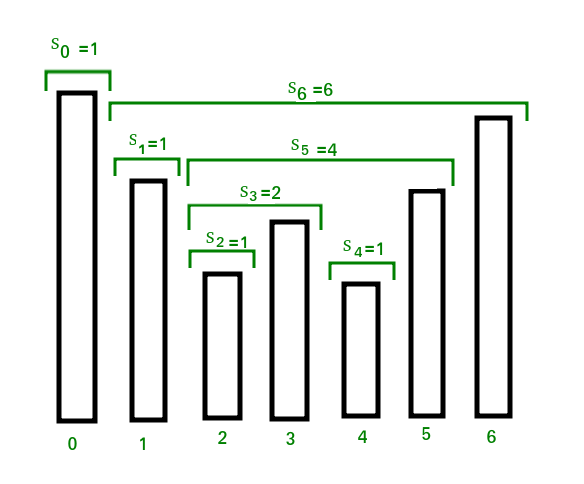

In [ ]:
from IPython.core.display import Image, display
display(Image('https://media.geeksforgeeks.org/wp-content/uploads/Stock_span.png', width=390, unconfined=True))

In [ ]:
class Node:
    def __init__(self,data):
        self.data = data
        self.next = None
class Stack:
    def __init__(self,first_node,max_items):
        self.head = Node(first_node)
        self.max_items = max_items
        self.len = 1
    def push(self,node):
        if self.head == None:
            self.head = Node(node)
            self.len +=1
        elif self.len < self.max_items:
            current = self.head
            self.head = Node(node)
            self.head.next = current
            self.len+=1
        else:
            raise Exception("Stack Memory is Full")
    def pop(self):
        if self.len == 0:
            raise Exception("Stack Is emplty")
        else:
            self.len -=1
            deleted_node = self.head
            self.head = self.head.next
            current = self.head
    def __len__(self):
        return self.len

def calculateSpan(price, Span):
    '''
        Use the stack to store the index by which we can manage the span
        Also complexity for stack in O(1) for push and pop
    '''
    n = len(price)
    #initializing stack
    st = Stack(0,n)
    st.push(0)
    Span[0] = 1
    for i in range(1, n):
        while(len(st) > 0 and price[st.head.data] <= price[i]):
            st.pop()
        '''
            Checking that if stack is empty means the element
            at i is the Largest amoung all
            Else its aht element at i is largest from i to
            element at stack head index
        '''
        Span[i] = i + 1 if len(st) <= 0 else (i - st.head.data)
        st.push(i)

price = [10, 4, 5, 90, 120, 80]
S = [0 for i in range(len(price)+1)]
calculateSpan(price, S)
print(S)

[1, 1, 2, 4, 5, 1, 0]


# Catalan Number

In [ ]:
def catalan(n):
    if n <= 1:
        return 1
    res = 0
    for i in range(n):
        res += catalan(i) * catalan(n-i-1)
    return res

# There is a simple formula for catalan nummber 
for i in range(10):
    print(i,catalan(i))

0 1
1 1
2 2
3 5
4 14
5 42
6 132
7 429
8 1430
9 4862


#  Two Sum Problem


Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Output: Because nums[0] + nums[1] == 9, we return [0, 1].

In [ ]:
class Solution:
    def twoSum(self, nums: list, target: int):
        check_dic = {n:i for i,n in enumerate(nums)}
        for index,number in enumerate(nums):
            if check_dic.get(target-number,0) != index and check_dic.get(target - number,0):
                return [index,check_dic.get(target-number)]
